https://data.cityofnewyork.us/Public-Safety/Bureau-of-Fire-Investigations-Fire-Causes/ii3r-svjz

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
path = r"C:\Users\Maryla\Desktop\MY_PROJECTS\excel files\Bureau_of_Fire_Investigations_-_Fire_Causes.csv"
fire = pd.read_csv(path)
fire

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,01/01/2016 12:08:00 AM,Queens,50,08,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,01/01/2016 12:13:00 AM,Staten Island,21,02,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,01/01/2016 12:21:00 AM,Queens,37,05,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,01/01/2016 12:29:00 AM,Bronx,15,12,047,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary
...,...,...,...,...,...,...,...,...,...
32514,2020,12/31/2020 10:44:19 AM,Queens,49,03,115,MD Residential Structure,Incendiary - Combustible Material,Incendiary
32515,2020,12/31/2020 12:57:07 PM,Queens,46,04,110,No Fire,Preliminary Investigation Only,Other
32516,2020,12/31/2020 01:10:30 PM,Queens,49,03,115,PD Residential Structure,Stove - Electric,Appliances
32517,2020,12/31/2020 02:50:01 PM,Manhattan,16,09,030,MD Residential Structure,Incense,Hot Objects


In [31]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32519 entries, 0 to 32518
Data columns (total 9 columns):
Case_Year                  32519 non-null int64
Incident_DateTime          32519 non-null object
Borough                    32407 non-null object
Battalion                  29439 non-null object
Community_District         32403 non-null object
Precinct                   32408 non-null object
Incident_Classification    31824 non-null object
Cause_Fire_Description     32499 non-null object
Fire_Code_Category         32510 non-null object
dtypes: int64(1), object(8)
memory usage: 2.2+ MB


In [21]:
columns = [list(fire)]
columns

[['Case_Year',
  'Incident_DateTime',
  'Borough',
  'Battalion',
  'Community_District',
  'Precinct',
  'Incident_Classification',
  'Cause_Fire_Description',
  'Fire_Code_Category']]

In [192]:
columns = ['Case_Year','Borough',  
  'Incident_Classification',
  'Cause_Fire_Description',
  'Fire_Code_Category']
for x in columns:
    print(fire[x].value_counts())
    print()

2016    7989
2017    7340
2018    6589
2019    6319
2020    4272
2021      10
Name: Case_Year, dtype: int64

Brooklyn          9750
Bronx             7269
Manhattan         6895
Queens            6839
Staten Island     1634
Outside of NYC      20
Name: Borough, dtype: int64

MD Residential Structure          14754
PD Residential Structure           4638
Vehicle                            2792
Commercial Structure               2229
Outside Rubbish                    1501
Other                              1337
Burn Notification                  1031
MFA                                 549
No Fire                             509
Burn Notification (Albany)          452
Garage/Shed                         355
School                              235
Brush                               162
Transit                             145
Manhole                             131
Religious Structure                 122
Government Structure                122
Group Home                          118
Hosp

There is way too many categories in "Cause_Fire_Description" to use it for pivot table, but I can work with "Fire_Code_Category" or even "Incident_Classification". 

MD Residential Structure          14754
PD Residential Structure           4638
I wander what does it stand for: MD vs PD. There is no explanation in data dictionary..

I want to work with year 2020 first to see what are the trends with fire emergencies through out the year

In [61]:
fire_2019 = fire[fire["Case_Year"] == 2019]
fire_2020 = fire[fire["Case_Year"] == 2020]

### cleaning data
Let's check the data set

In [199]:
fire_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 369 to 32518
Data columns (total 11 columns):
Case_Year                  4272 non-null int64
Incident_DateTime          4272 non-null datetime64[ns]
Borough                    4272 non-null object
Battalion                  3552 non-null object
Community_District         4272 non-null object
Precinct                   4272 non-null object
Incident_Classification    4272 non-null object
Cause_Fire_Description     4272 non-null object
Fire_Code_Category         4272 non-null object
month                      4272 non-null int64
dayofyear                  4272 non-null int64
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 400.5+ KB


In [62]:
fire_2020.isnull().sum()
# only batalion is missing which is not gonna affect my findings
# two are missing for Incident classification and one for fire code category

Case_Year                    0
Incident_DateTime            0
Borough                      0
Battalion                  720
Community_District           0
Precinct                     0
Incident_Classification      2
Cause_Fire_Description       0
Fire_Code_Category           1
dtype: int64

In [45]:
fire_2020[fire_2020["Incident_Classification"].isnull()]

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
32046,2020,11/15/2020 08:51:17 PM,Manhattan,07,04,010,NaN,Preliminary Investigation Only,Other
32432,2020,12/25/2020 10:17:54 AM,Brooklyn,44,05,075,NaN,Preliminary Investigation Only,Other


I will replace this data with the most common classificatin for this particular Couse Fire Description

In [63]:
mode_fire_description= fire[fire["Cause_Fire_Description"] == "Preliminary Investigation Only"]["Incident_Classification"].mode()
mode_fire_description[0]

'MD Residential Structure'

In [64]:
fire_2020["Incident_Classification"].fillna(mode_fire_description[0], inplace =True)

In [65]:
fire_2020[fire_2020["Fire_Code_Category"].isnull()]

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
31978,2020,11/09/2020 10:06:34 PM,Manhattan,09,05,018,Manhole,Preliminary Investigation Only,NaN


In [66]:
mode_fire_category= fire[fire["Incident_Classification"] == "Manhole"]["Fire_Code_Category"].mode()
mode_fire_category

0    Other
dtype: object

In [67]:
mode_fire_category[0]

'Other'

In [68]:
fire_2020["Fire_Code_Category"].fillna(mode_fire_category[0], inplace = True)

In [69]:
fire_2020.isnull().sum()
# all is good now

Case_Year                    0
Incident_DateTime            0
Borough                      0
Battalion                  720
Community_District           0
Precinct                     0
Incident_Classification      0
Cause_Fire_Description       0
Fire_Code_Category           0
dtype: int64

### data analysis


### 1. What objects were the sources of the fire emergencies in nyc in 2020 by the borough

In [193]:
heatmap_data_2020 = fire_2020.pivot_table(index = "Incident_Classification", columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0, margins = True)


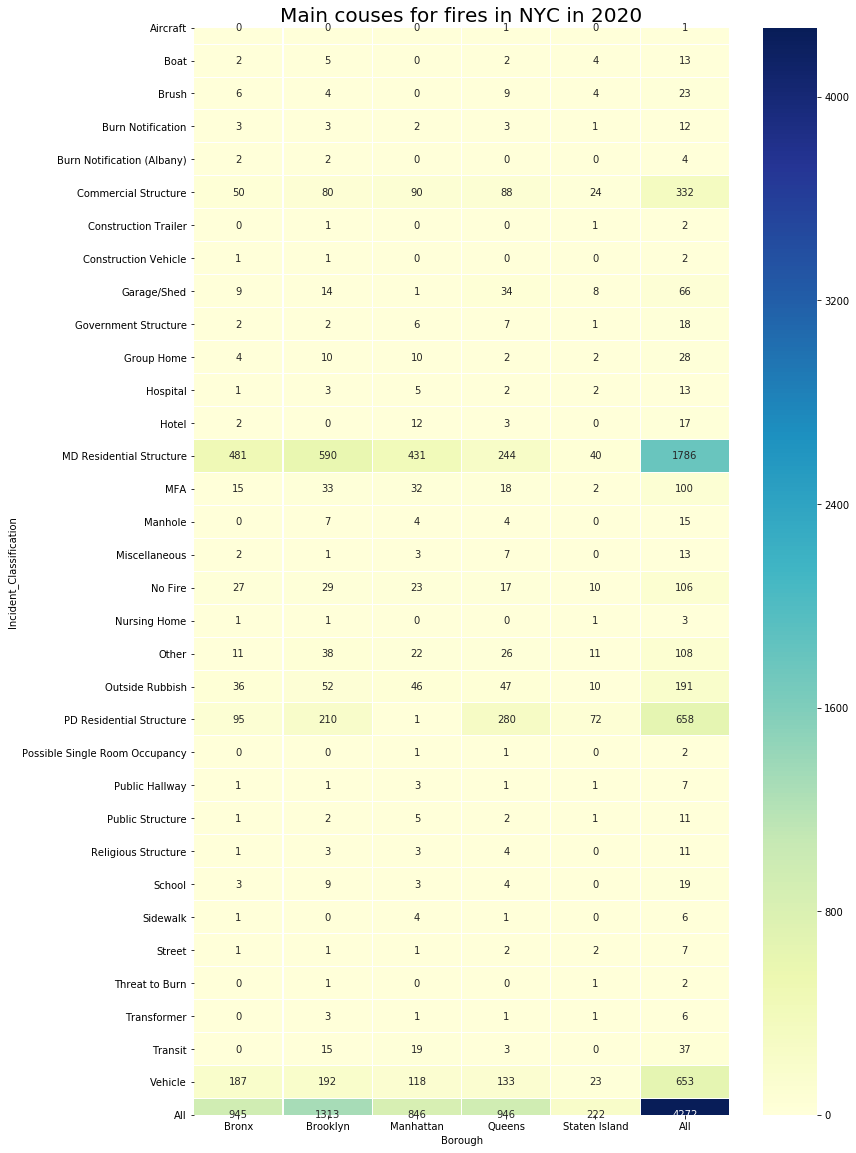

In [195]:
plt.figure(figsize = (12,20))
catskill_displ=sns.heatmap(heatmap_data_2020,  fmt=".0f" , annot=True, cmap="YlGnBu", linewidth=.03)
plt.title("Main couses for fires in NYC in 2020", size=20)
plt.show()

-	Total number of MS residential fires was 1786 cases, with Brooklyn topping the category with 590 cases and Bronx – 481.   
-	Number of PD residential structure fires was 658, with Queens experiencing 280, Brooklyn 210 and only one in Manhattan. 
-	Vehicle fires occurred 653 times mostly in Brooklyn (192) and Bronx (187).
-	Commercial structures were on the fourth place, causing almost equal number of fires in both Brooklyn and Queens, while Staten Island only had 24 cases. 
-	Garages/sheds burned the most in Queens, while rubbish mostly in Brooklyn. 
-	Manhattan had the most transit fires (19), and hospital fires (5) compering with other boroughs.




### What were causes of residencial fires in 2020?


In [94]:
fire_residencial_2020= fire_2020[(fire_2020["Incident_Classification"]== "MD Residential Structure") | (fire_2020["Incident_Classification"]== "PD Residential Structure")  ]

In [215]:
fire_residencial_2020.groupby("Fire_Code_Category").agg({"Cause_Fire_Description":"count"}).sort_values("Cause_Fire_Description", ascending = False)

,Cause_Fire_Description
Fire_Code_Category,
Incendiary,652
Electrical,615
Smoking,262
Other,253
Open Flame,176
Cooking Carelessness,168
Hot Objects,103
Appliances,86
Heaters,32


### What is the distribution of the causes of fire among different boroughs  for residencial buildings. 

In [227]:
fire_residencial_2020.pivot_table(index="Fire_Code_Category", columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0,  margins = True).sort_values(by=['All'], ascending = False).head(10 )

Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
Fire_Code_Category,,,,,,
All,576,800,432,524,112,2444
Incendiary,205,189,133,101,24,652
Electrical,129,218,92,144,32,615
Smoking,60,94,42,50,16,262
Other,52,73,46,67,15,253
Open Flame,38,59,30,43,6,176
Cooking Carelessness,26,49,30,50,13,168
Hot Objects,16,40,23,20,4,103
Appliances,23,25,16,21,1,86


### What were main categories of fires in 2020 in NYC?

In [230]:
fire_2020["Fire_Code_Category"].value_counts()

Incendiary              1293
Electrical               838
Other                    633
Smoking                  389
No Fire                  238
Cooking Carelessness     211
Open Flame               204
Hot Objects              161
Appliances               103
Motors                    65
Heaters                   46
Natural Sources           42
Ignitable                 41
Electrical Devices         8
Name: Fire_Code_Category, dtype: int64

### What was the subject of incendiary fires in 2020 by borough.

In [228]:
detail_pivot_2020 =fire_2020.pivot_table(index=["Fire_Code_Category", "Incident_Classification"], columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0,  margins = True).sort_values(by=['All'], ascending = False)

In [229]:
detail_pivot_2020.query("Fire_Code_Category==['Incendiary']")

Borough                                            Bronx  Brooklyn  Manhattan  \
Fire_Code_Category Incident_Classification                                      
Incendiary         MD Residential Structure          194       165        133   
                   Vehicle                            92        91         31   
                   Outside Rubbish                    22        31         38   
                   PD Residential Structure           11        24          0   
                   Commercial Structure                8        15         16   
                   Other                               4         6          4   
                   Transit                             0        10         14   
                   Garage/Shed                         3         2          0   
                   Brush                               2         1          0   
                   Government Structure                1         1          5   
                   Group Home                          2         5          3   
                   Hotel                               1         0          4   
                   Public Structure                    1         1          3   
                   Hospital                            1         1          2   
                   Miscellaneous                       1         0          1   
                   Public Hallway                      1         1          3   
                   Sidewalk                            1         0          3   
                   Religious Structure                 0         1          1   
                   Street                              0         0          1   
                   School                              2         1          0   
                   Burn Notification                   1         1          0   
                   Boat                                0         2          0   
                   Threat to Burn                      0         0          0   
                   Possible Single Room Occupancy      0         0          1   
                   Construction Vehicle                0         1          0   
                   Burn Notification (Albany)          1         0          0   

Borough                                            Queens  Staten Island  All  
Fire_Code_Category Incident_Classification                                     
Incendiary         MD Residential Structure            68             18  578  
                   Vehicle                             63              4  281  
                   Outside Rubbish                     33              6  130  
                   PD Residential Structure            33              6   74  
                   Commercial Structure                19              6   64  
                   Other                               14              3   31  
                   Transit                              2              0   26  
                   Garage/Shed                         10              0   15  
                   Brush                                8              3   14  
                   Government Structure                 5              0   12  
                   Group Home                           0              2   12  
                   Hotel                                2              0    7  
                   Public Structure                     1              1    7  
                   Hospital                             2              0    6  
                   Miscellaneous                        4              0    6  
                   Public Hallway                       0              1    6  
                   Sidewalk                             1              0    5  
                   Religious Structure                  2              0    4  
                   Street                               2              1    4  
                   School                          

In [209]:
fire_2020[fire_2020["Cause_Fire_Description"] == "Incendiary"]["Incident_Classification"].value_counts()

MD Residential Structure          397
Vehicle                           125
Outside Rubbish                    91
PD Residential Structure           42
Commercial Structure               35
Transit                            22
Other                              20
Garage/Shed                        11
Group Home                          9
Government Structure                9
Brush                               7
Hotel                               6
Public Structure                    6
Hospital                            5
Public Hallway                      5
Miscellaneous                       4
Religious Structure                 3
Street                              3
Sidewalk                            2
School                              2
Burn Notification (Albany)          1
Construction Vehicle                1
Possible Single Room Occupancy      1
Boat                                1
Name: Incident_Classification, dtype: int64

In [205]:
fire_residencial_2020.pivot_table(index="Fire_Code_Category", columns = "Borough", values = "Incident_DateTime", aggfunc=len, fill_value=0,  margins = True).sort_values(by=['Manhattan'], ascending = False)


Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
Fire_Code_Category,,,,,,
All,576,800,432,524,112,2444
Incendiary,205,189,133,101,24,652
Electrical,129,218,92,144,32,615
Other,52,73,46,67,15,253
Smoking,60,94,42,50,16,262
Cooking Carelessness,26,49,30,50,13,168
Open Flame,38,59,30,43,6,176
Hot Objects,16,40,23,20,4,103
Appliances,23,25,16,21,1,86


### Is there icrese/decrease in fire emergencies depending on the time of the year?


In [120]:
fire_2020.head(5) 

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
369,2020,06/11/2020 06:27:00 PM,Brooklyn,43,13,060,MD Residential Structure,Incendiary,Incendiary
26307,2020,05/08/2020 07:15:00 AM,Bronx,20,11,049,Commercial Structure,Incendiary - Ignitable Liquid,Incendiary
26309,2020,02/05/2020 06:41:00 PM,Brooklyn,43,13,060,PD Residential Structure,Incendiary,Incendiary
26381,2020,04/15/2020 11:46:00 PM,Brooklyn,33,15,061,Commercial Structure,Incendiary,Incendiary
26392,2020,01/21/2020 01:26:00 AM,Manhattan,10,11,023,MD Residential Structure,SIU Investigation,Other


In [122]:
fire_2020["Incident_DateTime"]=pd.to_datetime(fire_2020.Incident_DateTime)

C:\Users\Maryla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
fire_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272 entries, 369 to 32518
Data columns (total 9 columns):
Case_Year                  4272 non-null int64
Incident_DateTime          4272 non-null datetime64[ns]
Borough                    4272 non-null object
Battalion                  3552 non-null object
Community_District         4272 non-null object
Precinct                   4272 non-null object
Incident_Classification    4272 non-null object
Cause_Fire_Description     4272 non-null object
Fire_Code_Category         4272 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 333.8+ KB


In [189]:
fire_2020["Incident_DateTime"].dt.weekday_name.value_counts()

Sunday       657
Tuesday      616
Monday       611
Saturday     606
Wednesday    605
Thursday     590
Friday       587
Name: Incident_DateTime, dtype: int64

In [190]:
fire_2020["Incident_DateTime"].dt.time.value_counts().sort_index()

00:00:00    3
00:00:07    1
00:00:12    1
00:01:00    1
00:01:02    1
           ..
23:59:00    1
23:59:04    1
23:59:09    1
23:59:12    1
23:59:52    1
Name: Incident_DateTime, Length: 3922, dtype: int64

In [138]:
fire_2020["month"]=fire_2020["Incident_DateTime"].dt.month

C:\Users\Maryla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
fire_2020.head()

,Case_Year,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category,month
369,2020,2020-06-11 18:27:00,Brooklyn,43,13,060,MD Residential Structure,Incendiary,Incendiary,6
26307,2020,2020-05-08 07:15:00,Bronx,20,11,049,Commercial Structure,Incendiary - Ignitable Liquid,Incendiary,5
26309,2020,2020-02-05 18:41:00,Brooklyn,43,13,060,PD Residential Structure,Incendiary,Incendiary,2
26381,2020,2020-04-15 23:46:00,Brooklyn,33,15,061,Commercial Structure,Incendiary,Incendiary,4
26392,2020,2020-01-21 01:26:00,Manhattan,10,11,023,MD Residential Structure,SIU Investigation,Other,1


In [168]:
all_fire = fire_2020["month"].value_counts().sort_index()
other = fire_2020[fire_2020["Fire_Code_Category"]== "Other"]["month"].value_counts().sort_index()
incendiary = fire_2020[fire_2020["Fire_Code_Category"]== "Incendiary"]["month"].value_counts().sort_index()
heaters = fire_2020[fire_2020["Fire_Code_Category"]== "Heaters"]["month"].value_counts().sort_index()
electrical = fire_2020[fire_2020["Fire_Code_Category"]== "Electrical"]["month"].value_counts().sort_index()
smoking = fire_2020[fire_2020["Fire_Code_Category"]== "Smoking"]["month"].value_counts().sort_index()
open_flame = fire_2020[fire_2020["Fire_Code_Category"]== "Open Flame"]["month"].value_counts().sort_index()
cooking_carelessness = fire_2020[fire_2020["Fire_Code_Category"]== "Cooking Carelessness"]["month"].value_counts().sort_index()

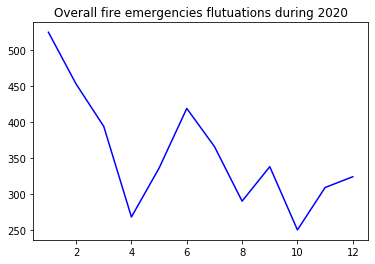

In [183]:
plt.plot(all_fire, color = "b")
plt.title("Overall fire emergencies flutuations during 2020")
plt.show()

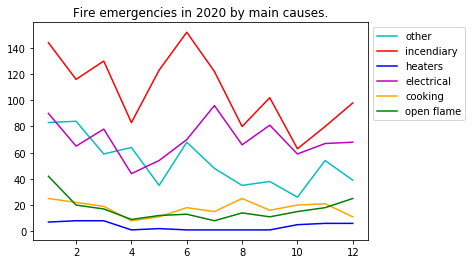

In [179]:
plt.plot(other, color = "c" )
plt.plot(incendiary, color = "r")
plt.plot(heaters, color = "b")
plt.plot(electrical, color = "m")
plt.plot(cooking_carelessness, color = "orange")
plt.plot(open_flame, color = "g")
plt.legend(['other','incendiary', 'heaters', 'electrical', 'cooking', 'open flame'], loc = 0, bbox_to_anchor =(1,1))
plt.title("Fire emergencies in 2020 by main causes.")
plt.show()

In [176]:
#whatare the other category description: 
fire_2020[fire_2020["Fire_Code_Category"] == "Other"]["Cause_Fire_Description" ].value_counts()

Preliminary Investigation Only                       493
SIU Investigation                                     56
Other                                                 34
Exothermic Chemical Reaction                          19
Not Ascertained                                       18
Juvenile Firesetter Intervention                       9
Albany Burn Notif. Related to a Previous BFI Inv.      3
Under Investigation                                    1
Name: Cause_Fire_Description, dtype: int64

In [ ]:
Other                   9110
Incendiary              7191
Electrical              4631
Smoking                 3707
Open Flame              1659
No Fire                 1494
Cooking Carelessness    1451
Hot Objects             1279
Appliances               762
Motors                   417
Heaters                  334
Ignitable                233
Natural Sources          181
Electrical Devices